# PHYS510: McDonalds store locations
### By Philippe Nguyen

In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
import matplotlib.patches as patches
%matplotlib inline

In [2]:
with open('mcD.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    d = list(reader)
ll_full = pd.DataFrame(d, columns=['long', 'lat'])

# Convert str to float
for index, row in ll_full.iterrows():
    ll_full.loc[index,'long'] = float(row[0])
    ll_full.loc[index,'lat'] = float(row[1])

In [10]:
def heat_map(x,y,xbin=50,ybin=50):
    """Give me x and y positions, and a number of bins for each dim, and I spit out a density array for those bins."""
    x_arr=np.array(x)
    y_arr=np.array(y)

    # Loop over data points
#     density_x, x_bins = np.histogram(x_arr, xbin)
#     density_y, y_bins = np.histogram(y_arr, ybin)
#     density = np.outer(density_y, density_x)
    density, xbins, ybins = np.histogram2d()
    
    # Return density array and x,y bin arrays
    return density, x_bins, y_bins

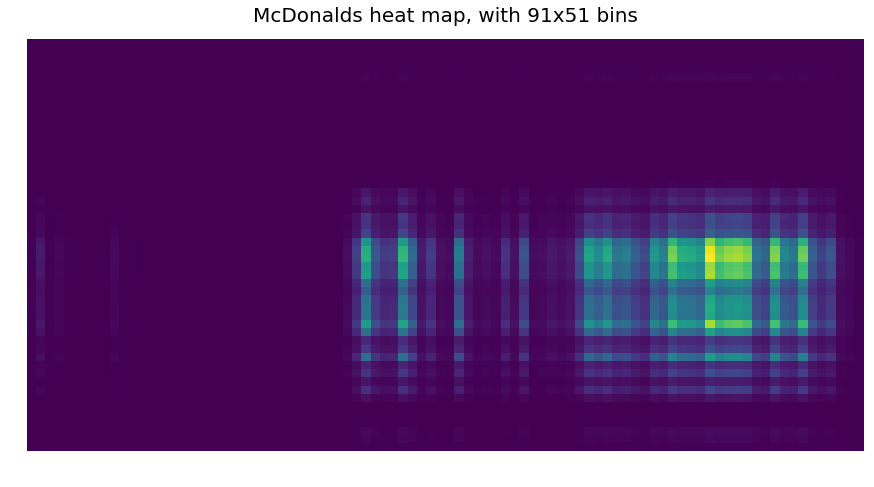

In [14]:
n_long_bins = int((max(ll_full['long']) - min(ll_full['long']))/0.01)
n_lat_bins = int((max(ll_full['lat']) - min(ll_full['lat']))/0.01)
density_full, long_full_bins, lat_full_bins = heat_map(ll_full['long'], ll_full['lat'], 90, 50)

plt.figure(figsize=(15,8))
plt.pcolor(long_full_bins, lat_full_bins, density_full)
plt.title('McDonalds heat map, with {}x{} bins'.format(len(long_full_bins),len(lat_full_bins)) , size=20)
plt.axis('equal')
plt.axis('off')
plt.show()